In [1]:
import glob
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset

#using numpy
import numpy as np

#for data load or save
import pandas as pd

#visualize some datasets
import matplotlib.pyplot as plt

#check our work directory
import os

In [2]:
class dataset(torch.utils.data.Dataset):
    
    def __init__(self,file_list,transform=None):
        self.file_list = file_list
        self.transform = transform
        
        
    #dataset length
    def __len__(self):
        self.filelength = len(self.file_list)
        return self.filelength
    
    #load an one of images
    def __getitem__(self,idx):
        img_path = self.file_list[idx]
        #print(img_path)
        img = Image.open(img_path)
        img_transformed = self.transform(img)
        
        label = img_path.split('/')[-1].split('.')[1]
        if label == 'brown_bears':
            label=0
        elif label == 'polar_bears':
            label=1
        #print(label)  
            
        return img_transformed,label

In [3]:
images_list = []
images_list = glob.glob(os.path.join('dataset/dataset_random_name','*.jpg'))
train_list = images_list[0 : int(len(images_list)*0.8)]
test_list = images_list[int(len(images_list)*0.8) : int(len(images_list)*0.9)]
val_list = images_list[int(len(images_list)*0.9) : int(len(images_list))]

In [4]:
print(len(images_list))
print(images_list[:5])
    
print(len(train_list))
print(train_list[:5])
    
print(len(test_list))
print(test_list[:5])
    
print(len(val_list))
print(val_list[:5])

2085
['dataset/dataset_random_name\\00001.polar_bears.jpg', 'dataset/dataset_random_name\\00012.brown_bears.jpg', 'dataset/dataset_random_name\\00015.brown_bears.jpg', 'dataset/dataset_random_name\\00018.brown_bears.jpg', 'dataset/dataset_random_name\\00019.polar_bears.jpg']
1668
['dataset/dataset_random_name\\00001.polar_bears.jpg', 'dataset/dataset_random_name\\00012.brown_bears.jpg', 'dataset/dataset_random_name\\00015.brown_bears.jpg', 'dataset/dataset_random_name\\00018.brown_bears.jpg', 'dataset/dataset_random_name\\00019.polar_bears.jpg']
208
['dataset/dataset_random_name\\08065.polar_bears.jpg', 'dataset/dataset_random_name\\08070.brown_bears.jpg', 'dataset/dataset_random_name\\08071.polar_bears.jpg', 'dataset/dataset_random_name\\08080.brown_bears.jpg', 'dataset/dataset_random_name\\08084.brown_bears.jpg']
209
['dataset/dataset_random_name\\09081.polar_bears.jpg', 'dataset/dataset_random_name\\09083.brown_bears.jpg', 'dataset/dataset_random_name\\09084.brown_bears.jpg', 'datas

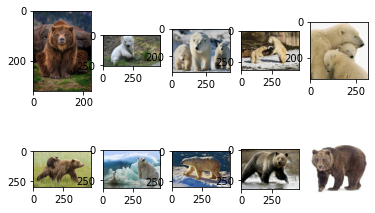

In [5]:
random_idx = np.random.randint(1,len(images_list),size=10)

fig = plt.figure()
i=1
for idx in random_idx:
    ax = fig.add_subplot(2,5,i)
    img = Image.open(images_list[idx])
    plt.imshow(img)
    i+=1

plt.axis('off')
plt.show()

In [6]:
print(train_list[0].split('/')[1].split('.')[0].split('\\')[1])

00001


In [7]:
train_transforms =  transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])

val_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])

test_transforms = transforms.Compose([   
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])
    
train_data = dataset(train_list, transform=train_transforms)
test_data = dataset(test_list, transform=test_transforms)
val_data = dataset(val_list, transform=val_transforms)

In [8]:
def create_img_name_list(img_list):
    res_list = []
    for i in range(0, len(img_list)):
        res_list.append(img_list[i].split('/')[1].split('.')[0].split('\\')[1])
        
    return res_list

In [9]:
train_imd_name = create_img_name_list(train_list)
test_imd_name = create_img_name_list(test_list)
val_imd_name = create_img_name_list(val_list)

print(train_imd_name[:5])
print(test_imd_name[:5])
print(val_imd_name[:5])

['00001', '00012', '00015', '00018', '00019']
['08065', '08070', '08071', '08080', '08084']
['09081', '09083', '09084', '09084', '09091']


In [10]:
print(train_data[1])

(tensor([[[0.1176, 0.1137, 0.1059,  ..., 0.1059, 0.1020, 0.0980],
         [0.1059, 0.1020, 0.1020,  ..., 0.1059, 0.1020, 0.0980],
         [0.1098, 0.1059, 0.1059,  ..., 0.1098, 0.1059, 0.1020],
         ...,
         [0.1961, 0.1843, 0.1804,  ..., 0.0706, 0.0667, 0.0627],
         [0.2118, 0.2000, 0.1922,  ..., 0.0667, 0.0667, 0.0627],
         [0.2000, 0.2000, 0.2078,  ..., 0.0627, 0.0588, 0.0549]],

        [[0.2078, 0.2039, 0.2039,  ..., 0.2275, 0.2314, 0.2314],
         [0.1882, 0.1882, 0.1882,  ..., 0.2275, 0.2314, 0.2314],
         [0.1843, 0.1882, 0.1882,  ..., 0.2314, 0.2353, 0.2353],
         ...,
         [0.1529, 0.1412, 0.1373,  ..., 0.1961, 0.1922, 0.1882],
         [0.1686, 0.1569, 0.1490,  ..., 0.2118, 0.2078, 0.2039],
         [0.1569, 0.1569, 0.1647,  ..., 0.2196, 0.2196, 0.2157]],

        [[0.3333, 0.3294, 0.3255,  ..., 0.3608, 0.3569, 0.3529],
         [0.3059, 0.3059, 0.3059,  ..., 0.3569, 0.3569, 0.3529],
         [0.2941, 0.2941, 0.2941,  ..., 0.3647, 0.3608, 0

In [11]:
lr = 0.001 # learning_rate
batch_size = 100 # we will use mini-batch method
epochs = 10 # How much to train a model

In [12]:
train_loader = torch.utils.data.DataLoader(dataset = train_data, 
                                           batch_size=batch_size, 
                                           shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, 
                                          batch_size=batch_size, 
                                          shuffle=False)
val_loader = torch.utils.data.DataLoader(dataset = val_data, 
                                         batch_size=batch_size, 
                                         shuffle=False)

In [13]:
print(len(train_data), len(train_loader))
print(len(val_data), len(val_loader))
train_data[0][0].shape

1668 17
209 3


torch.Size([3, 224, 224])

In [14]:
class Cnn(nn.Module):
    def __init__(self):
        super(Cnn,self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3, padding=0,stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16,32, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(32,64, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        
        self.fc1 = nn.Linear(3*3*64,10)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(10,1)
        self.relu = nn.ReLU()
        
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = torch.nn.Flatten()(out)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return torch.nn.Sigmoid()(out)

In [15]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(1234)
if device =='cuda':
    torch.cuda.manual_seed_all(1234)
    
model = Cnn().to(device)

In [21]:
optimizer = optim.Adam(params = model.parameters(),lr=0.001)
criterion = nn.BCELoss()

In [22]:
epochs = 10

accuracy_values = []
loss_values = []

val_accuracy_values = []
val_loss_values = []
model.train()
for epoch in range(epochs):
    epoch_loss = 0
    epoch_accuracy = 0
    
    for data, label in train_loader:
        data = data.to(device)
        label = label.to(device)
        
        output = model(data)
        loss = criterion(output, label.unsqueeze(dim=1).to(torch.float))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        acc = ((output.argmax(dim=1) == label).float().mean())
        epoch_accuracy += acc/len(train_loader)
        epoch_loss += loss/len(train_loader)
        
    print('Epoch : {}, train accuracy : {}, train loss : {}'.format(epoch+1, epoch_accuracy,epoch_loss))
    
    accuracy_values.append(epoch_accuracy.item())
    loss_values.append(epoch_loss.item())
    
    with torch.no_grad():
        epoch_val_accuracy=0
        epoch_val_loss =0
        for data, label in val_loader:
            data = data.to(device)
            label = label.to(device)
            
            val_output = model(data)
            val_loss = criterion(val_output,label.unsqueeze(dim=1).to(torch.float))
            
            
            acc = ((val_output.argmax(dim=1) == label).float().mean())
            epoch_val_accuracy += acc/ len(val_loader)
            epoch_val_loss += val_loss/ len(val_loader)
            
        val_accuracy_values.append(epoch_val_accuracy.item())
        val_loss_values.append(epoch_val_loss.item())
        print('Epoch : {}, val_accuracy : {}, val_loss : {}'.format(epoch+1, epoch_val_accuracy,epoch_val_loss))

Epoch : 1, train accuracy : 0.4903806149959564, train loss : 0.1799776554107666
Epoch : 1, val_accuracy : 0.602222204208374, val_loss : 0.10995636880397797
Epoch : 2, train accuracy : 0.4934256374835968, train loss : 0.1708095818758011
Epoch : 2, val_accuracy : 0.602222204208374, val_loss : 0.10132692009210587
Epoch : 3, train accuracy : 0.4925951659679413, train loss : 0.143884539604187
Epoch : 3, val_accuracy : 0.602222204208374, val_loss : 0.10132111608982086


KeyboardInterrupt: 

In [ ]:
print(accuracy_values)
print('------------------------------')
print(loss_values)
plt.figure(figsize=(15, 5))
plt.plot(range(10), accuracy_values, color="green")
plt.plot(range(10),loss_values, color="blue")
plt.legend(["Accuracy", "Loss"])